In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import sklearn
import keras
import tensorflow

In [53]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
index = test.index

train_labels = train.label
train = train.drop(columns = "label")

# Preparing data for neural network

train = train.values.astype("float") / 255
test = test.values.astype("float") / 255

In [54]:
train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (42000, 784)
Test shape: (28000, 784)


### Sample images from train dataset

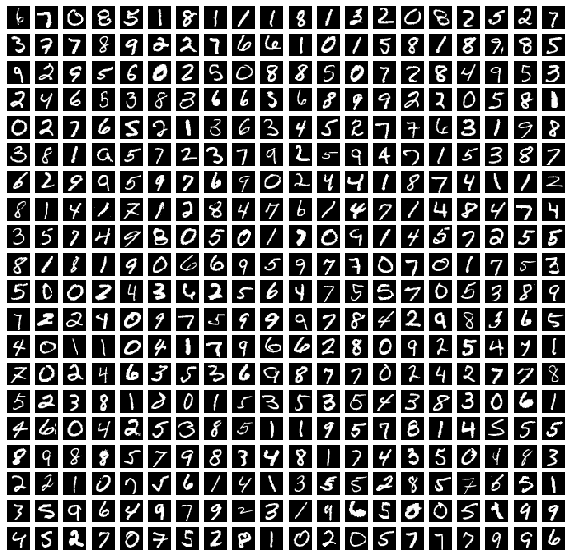

In [33]:
images = np.random.choice(train.shape[0], 400)
plt.figure(figsize = (10, 10))
for i in range(400):
    plt.subplot(20, 20, i + 1)
    plt.imshow(train[images[i]].reshape((28, 28)), cmap = "gray")
    plt.axis("off")

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.2, random_state = 42)

In [57]:
from keras.utils import to_categorical

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation = "relu"))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation = "relu"))
network.add(layers.Dense(10, activation = "softmax"))

network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [60]:
network.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [61]:
history = network.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
525/525 [==============================] - 10s 20ms/step - loss: 0.2513 - accuracy: 0.9199 - val_loss: 0.0890 - val_accuracy: 0.9713
Epoch 2/20
525/525 [==============================] - 10s 20ms/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.0489 - val_accuracy: 0.9837
Epoch 3/20
525/525 [==============================] - 11s 20ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0407 - val_accuracy: 0.9876
Epoch 4/20
525/525 [==============================] - 10s 20ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 5/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0323 - val_accuracy: 0.9899
Epoch 6/20
525/525 [==============================] - 11s 22ms/step - loss: 0.0199 - accuracy: 0.9941 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 7/20
525/525 [==============================] - 11s 21ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0321 - val_accuracy:

In [62]:
history_dict = history.history
history_dict

{'loss': [0.2513425648212433,
  0.06723149865865707,
  0.044322799891233444,
  0.03399909287691116,
  0.02476571314036846,
  0.01991352066397667,
  0.016505761072039604,
  0.012947284616529942,
  0.011373788118362427,
  0.009348495863378048,
  0.007188526447862387,
  0.007368931546807289,
  0.00623351102694869,
  0.005054096225649118,
  0.005305232480168343,
  0.004022702109068632,
  0.0031077431049197912,
  0.00323893572203815,
  0.0033168599475175142,
  0.0032632763031870127],
 'accuracy': [0.9198809266090393,
  0.9791666865348816,
  0.9861606955528259,
  0.9891964197158813,
  0.9922321438789368,
  0.9941071271896362,
  0.9949702620506287,
  0.9957737922668457,
  0.9968452453613281,
  0.9972618818283081,
  0.9975297451019287,
  0.9977976083755493,
  0.9982737898826599,
  0.9986011981964111,
  0.9983928799629211,
  0.9986607432365417,
  0.9989583492279053,
  0.9989880919456482,
  0.9991369247436523,
  0.998839259147644],
 'val_loss': [0.0890379473567009,
  0.04886626824736595,
  0.040

Text(0, 0.5, 'Loss')

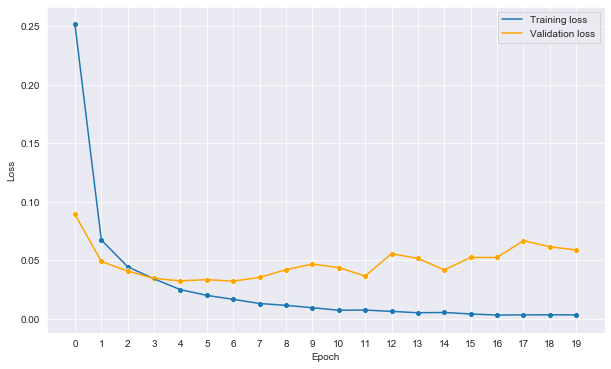

In [63]:
plt.figure(figsize = (10, 6))

sns.lineplot(x = range(len(history_dict["loss"])), y = history_dict["loss"], label = "Training loss")
sns.scatterplot(x = range(len(history_dict["loss"])), y = history_dict["loss"])

sns.lineplot(x = range(len(history_dict["val_loss"])), y = history_dict["val_loss"], color = "orange", label = "Validation loss")
sns.scatterplot(x = range(len(history_dict["val_loss"])), y = history_dict["val_loss"], color = "orange")

plt.xticks(range(20))

plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Categorical accuracy')

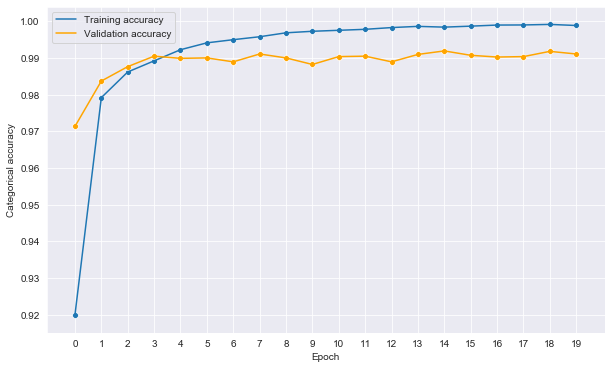

In [64]:
plt.figure(figsize = (10, 6))

sns.lineplot(x = range(len(history_dict["accuracy"])), y = history_dict["accuracy"], label = "Training accuracy")
sns.scatterplot(x = range(len(history_dict["accuracy"])), y = history_dict["accuracy"])

sns.lineplot(x = range(len(history_dict["val_accuracy"])), y = history_dict["val_accuracy"], color = "orange", label = "Validation accuracy")
sns.scatterplot(x = range(len(history_dict["val_accuracy"])), y = history_dict["val_accuracy"], color = "orange")

plt.xticks(range(20))

plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")

In [65]:
network.evaluate(X_test, y_test)

263/263 [==============================] - 1s 5ms/step - loss: 0.0587 - accuracy: 0.9911


[0.058711327612400055, 0.9910714030265808]

Accuracy score: 0.9910714285714286
     0    1    2    3    4    5    6    7    8    9
0  813    0    0    0    0    0    2    0    0    1
1    0  906    0    0    0    0    1    2    0    0
2    1    1  840    1    3    0    0    0    0    0
3    0    0    2  932    0    3    0    0    0    0
4    2    0    0    0  833    0    2    0    0    2
5    1    0    0    5    1  690    4    0    0    1
6    2    2    0    0    0    1  779    0    1    0
7    1    2    4    0    2    0    0  881    1    2
8    1    2    1    2    2    2    0    0  824    1
9    3    1    1    0    3    0    0    1    2  827


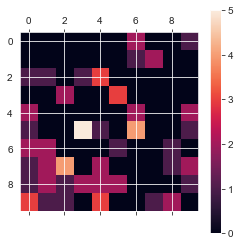

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = np.argmax(network.predict(X_test), axis = 1)

print("Accuracy score:", accuracy_score(np.argmax(y_test, axis = 1), y_test_pred))
conf_mx = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis = 1), y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

### Implemented neural network has high test accuracy score but it make some mistakes. Let's see on which images (here are shown 20 wrong classified images). Some of this images are difficult to recognize by human eye.

Predicted number: 5
Real number: 8
Image:


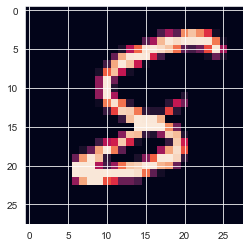

Predicted number: 4
Real number: 5
Image:


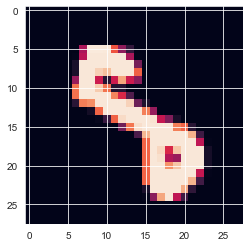

Predicted number: 4
Real number: 7
Image:


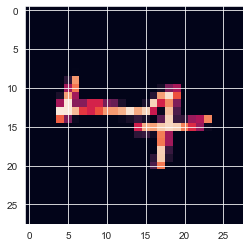

Predicted number: 9
Real number: 5
Image:


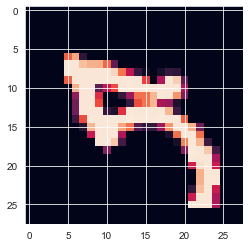

Predicted number: 2
Real number: 9
Image:


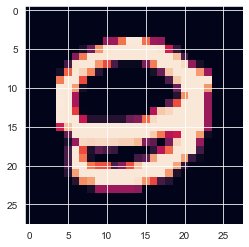

Predicted number: 1
Real number: 7
Image:


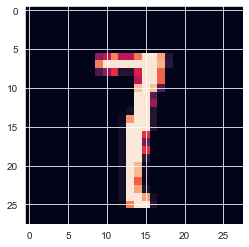

Predicted number: 3
Real number: 5
Image:


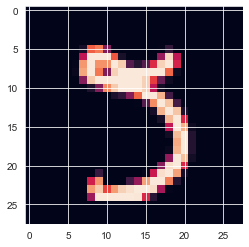

Predicted number: 3
Real number: 2
Image:


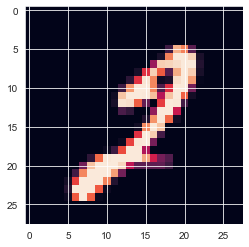

Predicted number: 0
Real number: 6
Image:


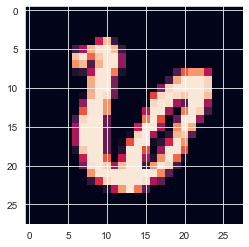

Predicted number: 4
Real number: 2
Image:


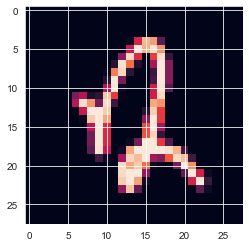

Predicted number: 6
Real number: 0
Image:


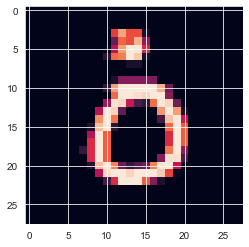

Predicted number: 0
Real number: 9
Image:


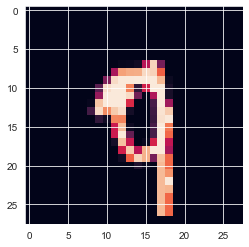

Predicted number: 0
Real number: 8
Image:


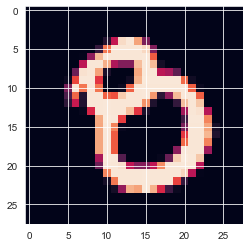

Predicted number: 2
Real number: 7
Image:


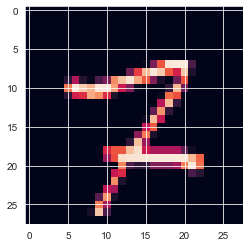

Predicted number: 4
Real number: 2
Image:


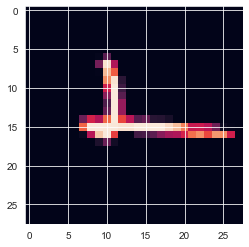

Predicted number: 6
Real number: 5
Image:


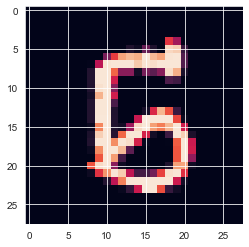

Predicted number: 0
Real number: 6
Image:


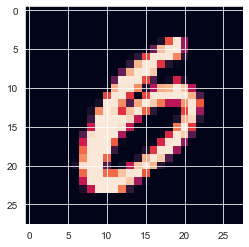

Predicted number: 8
Real number: 6
Image:


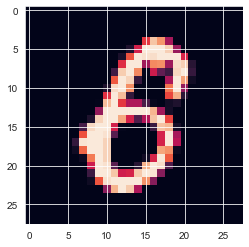

Predicted number: 4
Real number: 2
Image:


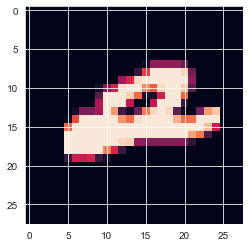

Predicted number: 9
Real number: 4
Image:


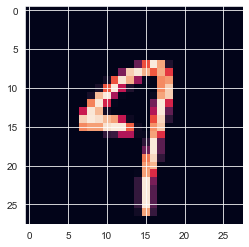

Predicted number: 2
Real number: 7
Image:


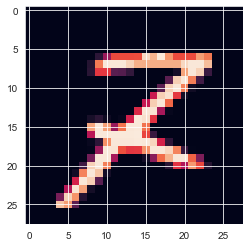

In [67]:
for i in range(np.sum([np.argmax(y_test, axis = 1) != y_test_pred])):
    print("Predicted number:", y_test_pred[(np.argmax(y_test, axis = 1) != y_test_pred)][i])
    print("Real number:", np.argmax(y_test, axis = 1)[(np.argmax(y_test, axis = 1) != y_test_pred)][i])
    print("Image:")
    plt.imshow(X_test[(np.argmax(y_test, axis = 1) != y_test_pred)][i].reshape(28, 28))
    plt.show()
    if i == 20:
        break

#### Accuracy plot shows that after few epochs validation accuracy don't gain so to retrain network will be used 10 epochs.

In [74]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation = "relu"))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation = "relu"))
network.add(layers.Dense(10, activation = "softmax"))

network.compile(optimizer = "rmsprop",
               loss = "categorical_crossentropy",
               metrics = ["accuracy"])

network.fit(train.reshape((train.shape[0], 28, 28, 1)), to_categorical(train_labels), batch_size = 64, epochs = 3)

Epoch 1/3
657/657 [==============================] - 12s 18ms/step - loss: 0.2117 - accuracy: 0.9335
Epoch 2/3
657/657 [==============================] - 11s 17ms/step - loss: 0.0540 - accuracy: 0.9830
Epoch 3/3
657/657 [==============================] - 11s 17ms/step - loss: 0.0370 - accuracy: 0.9882


In [75]:
test_pred = np.argmax(network.predict(test.reshape((test.shape[0], 28, 28, 1))), axis = 1)

In [76]:
digit_submission = (pd.concat([pd.Series(range(len(index)), name = "ImageId") + 1, 
            pd.Series(test_pred, name = "Label")], axis = 1).set_index("ImageId"))

digit_submission

digit_submission.to_csv("digit_submission_nn.csv")